Name : Gourav Verma<br>
Class : DSC540-T303<br>
Topic : Advanced Data Gathering and Visualization<br>
Assignment : Weeks 9 & 10 Excercises<br>

In [30]:
# Import important libraries
import urllib.request, urllib.parse, urllib.error
import requests
from bs4 import BeautifulSoup
import ssl
import re
import json
import os
import twitter
import pandas as pd
import matplotlib.pyplot as plt

### Activity-9

In [3]:
# Check SSL certificate
ctx = ssl.create_default_context()
ctx.check_hostname = False
ctx.verify_mode = ssl.CERT_NONE

In [4]:
# Read HTML from URL
url = 'https://www.gutenberg.org/browse/scores/top'
response = requests.get(url)

In [5]:
# Write small function to check the status of request

def chk_status(resp):
    if resp.status_code==200:
        print("Successful Request..!")
        return 1
    else:
        print("Bad Response..!")
        return -1

In [6]:
chk_status(response)

Successful Request..!


1

In [7]:
# Decode the response and pass this on to BeautifulSoup for HTML parsing

contents = response.content.decode(response.encoding)
soup = BeautifulSoup(contents, 'html.parser')

In [8]:
# Find all href tags and store them in the list of links. Check what the list looks like- print the first 30 elements.

All_href=[]                              # Create empty list
for link in soup.find_all('a'):          # Find all tag 'a'
    All_href.append(link.get('href'))    # Scrape links from 'href' tag and append into the list


In [9]:
# Print first 30 elements

All_href[:30]                             # Print first 30 elements in list

['/wiki/Main_Page',
 '/catalog/',
 '/ebooks/',
 '/browse/recent/last1',
 '/browse/scores/top',
 '/wiki/Gutenberg:Offline_Catalogs',
 '/catalog/world/mybookmarks',
 '/wiki/Main_Page',
 'https://www.paypal.com/xclick/business=donate%40gutenberg.org&item_name=Donation+to+Project+Gutenberg',
 '/wiki/Gutenberg:Project_Gutenberg_Needs_Your_Donation',
 'http://www.ibiblio.org',
 'http://www.pgdp.net/',
 'pretty-pictures',
 '#books-last1',
 '#authors-last1',
 '#books-last7',
 '#authors-last7',
 '#books-last30',
 '#authors-last30',
 '/ebooks/1342',
 '/ebooks/11',
 '/ebooks/84',
 '/ebooks/1952',
 '/ebooks/844',
 '/ebooks/215',
 '/ebooks/98',
 '/ebooks/43',
 '/ebooks/2542',
 '/ebooks/1635',
 '/ebooks/1661']

In [10]:
# Use a regular expression to find the numeric digits in these links. These are the file numbers for the top 100 eBooks.

num=[]
for i in range(19,119):                       # 19 to 118 has book numbers
    link=All_href[i]                          # Evaluate each element
    link=link.strip()                         # Strip link from element
    n=re.findall('[0-9]+', link)              # regular expression to find numeric digits
    if len(n)==1:
        num.append(int(n[0]))                 # Add the number into list

print(num)

[1342, 11, 84, 1952, 844, 215, 98, 43, 2542, 1635, 1661, 2701, 25525, 120, 74, 1080, 1250, 174, 76, 376, 514, 55, 1400, 5200, 16, 2852, 46, 16328, 1260, 345, 2600, 205, 113, 2591, 4300, 158, 25344, 2097, 2814, 2500, 219, 42324, 45, 1232, 5740, 3825, 1184, 768, 43936, 2554, 244, 203, 62097, 36, 1064, 28054, 160, 1497, 42686, 3600, 521, 1998, 27827, 35, 6130, 1727, 863, 135, 236, 408, 58585, 996, 1399, 23700, 19942, 730, 972, 2680, 17396, 3207, 62096, 28860, 829, 161, 4363, 58975, 8800, 43453, 140, 23, 766, 209, 2781, 100, 33283, 2148, 145, 2000, 910, 1934]


In [11]:
# Use the .text method and print only the first 2000 characters

content = soup.text
content[:2000]

"\n\n\n\n\n\n\n\n\n      if (top != self) {\n        top.location.replace ('http://www.gutenberg.org');\n        alert ('Project Gutenberg is a FREE service with NO membership required. If you paid somebody else to get here, make them give you your money back!');\n      }\n    \n \nTop 100 - Project Gutenberg\n\n\n\n\n\n\n\n\nOnline Book Catalog\n=> \n\n\n\n Book  Search\n-- Recent  Books\n-- Top  100\n-- Offline Catalogs\n-- My Bookmarks\n\n\nMain Page\n\n\n\n\nProject Gutenberg needs your donation! \n        More Info\n\n\n\n\n\n\n\n\nDid you know that you can help us produce ebooks\nby proof-reading just one page a day?\nGo to: Distributed Proofreaders\n\n\n\nTop 100\n\n\nTo determine the ranking we count the times each file gets downloaded.\nBoth HTTP and FTP transfers are counted.\nOnly transfers from ibiblio.org are counted as we have no access to our mirrors log files.\nMultiple downloads from the same IP address on the same day count as one download.\nIP addresses that download

In [12]:
# Search in the extracted text(using regex) from soup object to find names of the top 100 eBoooks(yesterday's ranking)


title_temp=[]                            # Temp Empty list for name
strt_index=content.splitlines().index('Top 100 EBooks yesterday')     # Create Starting index

for i in range(100):                     # Loop for 100 times
    line = soup.text.splitlines()[strt_index+2+i]   # Read each line
    title_temp.append(line)                         # Add each line into the list

title_temp[:10]                                     # Print first 10 elements                                 

['Pride and Prejudice by Jane Austen (2255)',
 "Alice's Adventures in Wonderland by Lewis Carroll (1728)",
 'Frankenstein; Or, The Modern Prometheus by Mary Wollstonecraft Shelley (1497)',
 'The Yellow Wallpaper by Charlotte Perkins Gilman (1413)',
 'The Importance of Being Earnest: A Trivial Comedy for Serious People by Oscar Wilde (1077)',
 'The Call of the Wild by Jack London (1056)',
 'A Tale of Two Cities by Charles Dickens (1056)',
 'The Strange Case of Dr. Jekyll and Mr. Hyde by Robert Louis Stevenson (979)',
 'Et dukkehjem. English by Henrik Ibsen (974)',
 'Ion by Plato (954)']

In [13]:
# Use regex to to extract only text from the list

title_list=[]
for i in range(100):
    id1,id2=re.match('^[a-zA-Z ]*',title_temp[i]).span()  # Span over lost to extract only characters
    title_list.append(title_temp[i][id1:id2])             # Add them into the list

title_list                                                # Print the list


['Pride and Prejudice by Jane Austen ',
 'Alice',
 'Frankenstein',
 'The Yellow Wallpaper by Charlotte Perkins Gilman ',
 'The Importance of Being Earnest',
 'The Call of the Wild by Jack London ',
 'A Tale of Two Cities by Charles Dickens ',
 'The Strange Case of Dr',
 'Et dukkehjem',
 'Ion by Plato ',
 'The Adventures of Sherlock Holmes by Arthur Conan Doyle ',
 'Moby Dick',
 'The Works of Edgar Allan Poe',
 'Treasure Island by Robert Louis Stevenson ',
 'The Adventures of Tom Sawyer by Mark Twain ',
 'A Modest Proposal by Jonathan Swift ',
 'Anthem by Ayn Rand ',
 'The Picture of Dorian Gray by Oscar Wilde ',
 'Adventures of Huckleberry Finn by Mark Twain ',
 'A Journal of the Plague Year by Daniel Defoe ',
 'Little Women by Louisa May Alcott ',
 'The Wonderful Wizard of Oz by L',
 'Great Expectations by Charles Dickens ',
 'Metamorphosis by Franz Kafka ',
 'Peter Pan by J',
 'The Hound of the Baskervilles by Arthur Conan Doyle ',
 'A Christmas Carol in Prose',
 'Beowulf',
 'Jane Ey

### Activity 10

### Retrieve and print basic data about a movie from the web(OMDB database)


In [14]:
# Stored APIkey into APIkey_OMDB.json file

# Open JSOn file

with open('APIkey_OMDB.json') as f:
    keys=json.load(f)
    OMDBkey=keys['OMDBapi']

In [15]:
# Assign web address to a variable
surl = 'http://www.omdbapi.com/?'

# Create variable APIkey
apikey = '&apikey='+OMDBkey

In [16]:
# Write utility function called print_json to print the movie data from a JSON file(which we will get from the portal)

def print_json(json_data):
    mov_keys=['Title', 'Year', 'Rated', 'Released', 'Runtime', 'Genre', 'Director', 'Writer', 
              'Actors', 'Plot', 'Language', 'Country', 'Awards', 'Ratings', 
              'Metascore', 'imdbRating', 'imdbVotes', 'imdbID']
    for k in mov_keys:                            # Itterate over list of features
        if k in list(json_data.keys()):           # If movie has that feature, print it
            print(f"{k}: {json_data[k]}")

In [17]:
# Write utility function to download a poster

def dwnld_poster(json_data):
    title = json_data['Title']
    poster_url = json_data['Poster']
    
    # Get the file extension
    file_ext=poster_url.split('.')[-1]
    
    # Read image from web
    poster_data=urllib.request.urlopen(poster_url).read()
    
    # Get the location in computer to store the poster file
    savelocation=os.getcwd()+'\\'+'Posters'+'\\'
    
    # Create new directory if the directory does not exist
    if not os.path.isdir(savelocation):
        os.mkdir(savelocation)
    
    filename=savelocation+str(title)+'.'+file_ext     # Get the file name/location
    f=open(filename, 'wb')                            # Open file in write mode
    f.write(poster_data)                              # Write web data into the file
    f.close()                                         # Close the file
    

In [18]:
# Write a function to search a movie by its name

def search_movie(title):
    try:
        url = surl + urllib.parse.urlencode({'t': str(title)})+apikey   # Build complete URl
        print(url)                                                      # Print URL
        ureq = urllib.request.urlopen(url)                              # Open URL to read
        url_data = ureq.read()                                          # Read raw data from URL
        json_data = json.loads(url_data)                                # Load the data into JSON format
        
        # Check the response
        if json_data['Response']=='True':
            print_json(json_data)                                       # Call function to print the data
            
            # Check to download poster
            if json_data['Poster']!='N/A':
                dwnld_poster(json_data)                                 # Call function to download
        
        else:
            print('Error Occurred: ',json_data['Error'])                # Error for movie not found
    
    except urllib.error.URLError as e:                                  # Error for bad URL
        print(f"Error: {e.reason}")

        

In [19]:
search_movie("swades")

http://www.omdbapi.com/?t=swades&apikey=ca5fd586
Title: Swades
Year: 2004
Rated: Not Rated
Released: 17 Dec 2004
Runtime: 189 min
Genre: Drama
Director: Ashutosh Gowariker
Writer: M.G. Sathya (story), Ashutosh Gowariker (story), Ashutosh Gowariker (screenplay), Sameer Sharma (screenplay), Lalit Marathe (screenplay), Amin Hajee (screenplay), Charlotte Whitby-Coles (screenplay), Yashodeep Nigudkar (screenplay), Ayan Mukherjee (screenplay), K.P. Saxena (dialogue), Amin Hajee (Co-Writer)
Actors: Shah Rukh Khan, Gayatri Joshi, Kishori Ballal, Smit Sheth
Plot: A successful Indian scientist returns to an Indian village to take his nanny to America with him and in the process rediscovers his roots.
Language: Hindi, English
Country: India
Awards: 13 wins & 23 nominations.
Ratings: [{'Source': 'Internet Movie Database', 'Value': '8.2/10'}, {'Source': 'Rotten Tomatoes', 'Value': '83%'}]
Metascore: N/A
imdbRating: 8.2
imdbVotes: 79,007
imdbID: tt0367110


### Exercise 3: Connect to the Twitter API and do a simple data pull

In [20]:
# Connect to twitter API

api = twitter.Api(consumer_key='55Z25Wtk3UDp0v0vU0PHMHz1S', 
                  consumer_secret='5b0TMwZ0e6I2G5IVncsqSAWsIANCFIjXO41RlKyxRT08h8SPs4',
                 access_token_key='1261113131880689665-RED49MgKT0J9yo3wIrbDwR9GaR79U3',
                 access_token_secret='qE0owXdkHRbeniyyiAWQo0cAXWzhmi7VVeZCNIhKtKTxr')

In [21]:
# Check connection

print(api.VerifyCredentials())

{"created_at": "Fri May 15 01:56:30 +0000 2020", "default_profile": true, "default_profile_image": true, "id": 1261113131880689665, "id_str": "1261113131880689665", "name": "Gourav Verma", "profile_background_color": "F5F8FA", "profile_image_url": "http://abs.twimg.com/sticky/default_profile_images/default_profile_normal.png", "profile_image_url_https": "https://abs.twimg.com/sticky/default_profile_images/default_profile_normal.png", "profile_link_color": "1DA1F2", "profile_sidebar_border_color": "C0DEED", "profile_sidebar_fill_color": "DDEEF6", "profile_text_color": "333333", "profile_use_background_image": true, "screen_name": "garv0730"}


In [23]:
# Search tweets containing 'Bellevue University'

api.GetSearch(term='Bellevue University', since=2020-1-1, count=10)

[Status(ID=1261457326122418176, ScreenName=ALHSVollleyball, Created=Sat May 16 00:43:57 +0000 2020, Text='RT @ReiverSoftball: Kayla will be attending Bellevue University to continue her academics. \n\nCongrats Kayla!\n\n#GoReivers #SailsUp #StudentA…'),
 Status(ID=1261384590846877696, ScreenName=Kaayla123_, Created=Fri May 15 19:54:56 +0000 2020, Text='RT @ReiverSoftball: Kayla will be attending Bellevue University to continue her academics. \n\nCongrats Kayla!\n\n#GoReivers #SailsUp #StudentA…'),
 Status(ID=1261384412584951811, ScreenName=ssydneymccorkle, Created=Fri May 15 19:54:14 +0000 2020, Text='RT @ReiverSoftball: Kayla will be attending Bellevue University to continue her academics. \n\nCongrats Kayla!\n\n#GoReivers #SailsUp #StudentA…'),
 Status(ID=1261384374219505665, ScreenName=ALHSathletics, Created=Fri May 15 19:54:04 +0000 2020, Text='RT @ReiverSoftball: Kayla will be attending Bellevue University to continue her academics. \n\nCongrats Kayla!\n\n#GoReivers #SailsUp #Stud

In [27]:
# Search tweets containing 'Data Science'

api.GetSearch(term="DataScience", since=2020-1-1, count=10)

[Status(ID=1261280208965046272, ScreenName=DataCamp, Created=Fri May 15 13:00:09 +0000 2020, Text='Get your free, all-access pass to DataCamp! Join us this week for DataCamp’s Free Week through May 22—this is your… https://t.co/Hr4aEF71qP'),
 Status(ID=1260984505873182721, ScreenName=KirkDBorne, Created=Thu May 14 17:25:08 +0000 2020, Text='Is Robotic Process #Automation the next big trend in enterprise digitalization?\nhttps://t.co/5LTKjY9tov\n———————… https://t.co/iQBu5zjqOh'),
 Status(ID=1260799686677577728, ScreenName=KirkDBorne, Created=Thu May 14 05:10:44 +0000 2020, Text='#EdgeComputing enables the convergence of #AI and Sensors by integrating #IoT contextual data into actionable intel… https://t.co/2l81iq90z6'),
 Status(ID=1261472485590986752, ScreenName=hubofml, Created=Sat May 16 01:44:12 +0000 2020, Text='RT @MikeQuindazzi: #IoT economic impact projected to $11 trillion by 2025 &gt;&gt;&gt; @UN via @MikeQuindazzi &gt;&gt;&gt; #AI #MachineLearning #GDP #BigData…'),
 Status(ID

### Exercise 4: Visualization

In [31]:
# Read Jan 3-10 Core Trends Survey

Survey = pd.read_csv('January 3-10, 2018 - Core Trends Survey - CSV.csv')

In [54]:
Survey.describe()

,respid,sample,comp,int_date,lang,cregion,state,density,sex,eminuse,...,marital,educ2,emplnw,hisp,racem1,racecmb,inc,party,hh1,weight
count,2002.000000,2002.000000,2002.0,2002.000000,2002.000000,2002.000000,2002.000000,2002.000000,2002.000000,2002.000000,...,2002.000000,2002.00000,2002.000000,2002.000000,2002.000000,2002.000000,2002.000000,2002.000000,2002.000000,2002.000000
mean,76009.782717,1.750250,1.0,180105.636863,1.085415,2.677822,28.155345,3.046454,1.460040,1.139361,...,2.980020,6.24975,3.457043,1.981019,2.101898,2.036464,21.068432,2.706294,3.012987,1.000000
std,43691.053230,0.432977,0.0,2.275502,0.279567,1.014930,16.061673,1.416099,0.498525,0.375485,...,2.260983,11.92625,10.404676,1.073342,2.226236,2.009017,35.128846,1.836563,1.939575,0.484119
min,1.000000,1.000000,1.0,180103.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.376175
25%,100004.000000,2.000000,1.0,180104.000000,1.000000,2.000000,12.000000,2.000000,1.000000,1.000000,...,1.000000,3.00000,1.000000,2.000000,1.000000,1.000000,3.000000,2.000000,2.000000,0.630608
50%,100819.000000,2.000000,1.0,180105.000000,1.000000,3.000000,28.000000,3.000000,1.000000,1.000000,...,2.000000,5.00000,2.000000,2.000000,1.000000,1.000000,6.000000,2.000000,2.000000,0.890626
75%,101577.500000,2.000000,1.0,180108.000000,1.000000,3.000000,42.000000,4.000000,2.000000,1.000000,...,5.000000,6.00000,3.000000,2.000000,2.000000,2.000000,9.000000,3.000000,4.000000,1.276018
max,102430.000000,2.000000,1.0,180110.000000,2.000000,4.000000,56.000000,5.000000,2.000000,8.000000,...,9.000000,99.00000,99.000000,9.000000,9.000000,9.000000,99.000000,9.000000,9.000000,2.112972


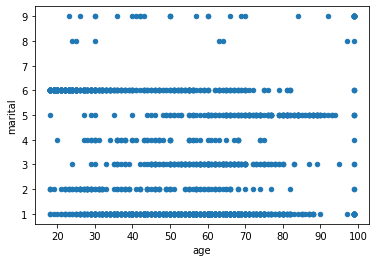

In [49]:
# Plot scatter graph between age and marital status.

# 1 Married
# 2 Living with a partner
# 3 Divorced
# 4 Separated
# 5 Widowed
# 6 Never been married
# 8 Don't know
# 9 Refused

Survey.plot(x='age', y='marital', kind='scatter')
plt.show()

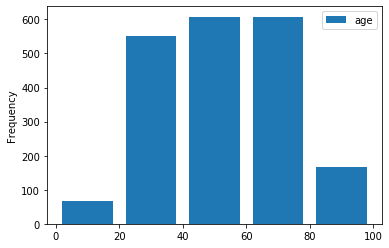

In [51]:
# Plot histogram of age

Survey[['age']].plot(kind='hist',bins=[0,20,40,60,80,100],rwidth=0.8)
plt.show()

In [63]:
# Bar plot with group by age and party

    1	Republican
	2	Democrat
	3	Independent
	4	(VOL.) No preference
	5	(VOL.) Other party
	8	(VOL.) Don't know
	9	(VOL.) Refused


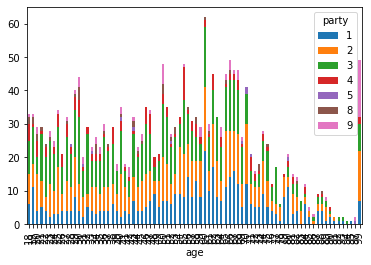

In [62]:
Survey.groupby(['age', 'party']).size().unstack().plot(kind='bar',stacked=True)
plt.show()